# Flights Dataset Exploration
## by Lujain Kotb

## Preliminary Wrangling

> The data are provided by Research and Innovative Technology Administration (RITA) and Bureau of Transportation Statistics (BTS).
Arrival and departure details for 123 million commercial flights throughout the United
States are recorded between October 1987
and December 2008, representing 29 commercial airlines and 3,376 airports. About 2.3 million flights were cancelled, 25 million flights
were at least 15 minutes late.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
flights = pd.read_csv('flights.csv')

### What is the structure of your dataset?

> The dataset is 99075 rows by 22 columns

In [3]:
flights.shape

(99075, 22)

In [4]:
pd.options.display.max_columns = None

In [5]:
flights.head(100)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2014,11,AA,American Airlines Inc.,JFK,"New York, NY: John F. Kennedy International",1277.0,208.0,59.81,7.39,83.94,0.00,56.86,3.0,0.0,12146.0,3860.0,1226.0,2953.0,0.0,4107.0,NaN
1,2014,11,AA,American Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2580.0,484.0,139.21,17.27,184.15,1.00,142.38,6.0,4.0,25351.0,9010.0,839.0,6011.0,17.0,9474.0,NaN
2,2014,11,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",12050.0,2427.0,559.84,55.11,710.89,2.70,1098.47,98.0,47.0,168401.0,57483.0,5147.0,28911.0,165.0,76695.0,NaN
3,2014,11,AA,American Airlines Inc.,OGG,"Kahului, HI: Kahului Airport",97.0,21.0,10.13,0.00,4.45,0.00,6.42,0.0,0.0,1866.0,825.0,0.0,147.0,0.0,894.0,NaN
4,2014,11,AA,American Airlines Inc.,HNL,"Honolulu, HI: Daniel K Inouye International",167.0,34.0,16.17,0.36,9.55,0.00,7.92,1.0,0.0,3434.0,2203.0,18.0,255.0,0.0,958.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2014,11,AS,Alaska Airlines Inc.,BRW,"Barrow, AK: Wiley Post/Will Rogers Memorial",75.0,13.0,1.02,1.43,2.70,0.00,7.84,3.0,1.0,656.0,25.0,37.0,80.0,0.0,514.0,NaN
96,2014,11,AS,Alaska Airlines Inc.,FAI,"Fairbanks, AK: Fairbanks International",139.0,16.0,8.79,0.00,3.03,0.00,4.18,2.0,1.0,676.0,330.0,0.0,126.0,0.0,220.0,NaN
97,2014,11,AS,Alaska Airlines Inc.,JNU,"Juneau, AK: Juneau International",286.0,50.0,8.54,9.19,12.98,0.00,19.29,5.0,13.0,2334.0,322.0,520.0,552.0,0.0,940.0,NaN
98,2014,11,AS,Alaska Airlines Inc.,KTN,"Ketchikan, AK: Ketchikan International",178.0,49.0,17.79,3.08,11.01,0.00,17.13,3.0,6.0,1618.0,469.0,75.0,342.0,0.0,732.0,NaN


In [6]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99075 entries, 0 to 99074
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 99075 non-null  int64  
 1    month               99075 non-null  int64  
 2   carrier              99075 non-null  object 
 3   carrier_name         99075 non-null  object 
 4   airport              99075 non-null  object 
 5   airport_name         99075 non-null  object 
 6   arr_flights          98912 non-null  float64
 7   arr_del15            98723 non-null  float64
 8   carrier_ct           98912 non-null  float64
 9    weather_ct          98912 non-null  float64
 10  nas_ct               98912 non-null  float64
 11  security_ct          98912 non-null  float64
 12  late_aircraft_ct     98912 non-null  float64
 13  arr_cancelled        98912 non-null  float64
 14  arr_diverted         98912 non-null  float64
 15   arr_delay           98912 non-null 

In [7]:
flights.drop(columns = 'Unnamed: 21', inplace = True)

In [8]:
flights.columns = flights.columns.str.strip()
flights.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest to investigate the reasons and frequencies for arrivals/delays are:
arr_flights,arr_del15 along with their delay amount in minutes for each reason(arr_delay,carrier_delay,...)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features that would support the investigation are:
>
> 1- Carrier (So we can group by this variable and have insights into each carrier's statistics
>
> 2- Airport (So we can find out if there is any airport that has certain types of problems occuring frequently, or the airports with highest delay statistics in general so we can address the problem at that airport thereof.

## Univariate Exploration

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


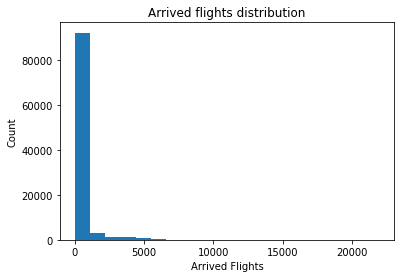

In [9]:
plt.hist(flights['arr_flights'],bins = 20);
plt.title('Arrived flights distribution');
plt.xlabel('Arrived Flights')
plt.ylabel('Count');

- Given this plot we can see that there's alot of outliers causing our view of the data to be distorted with values exceeding 20,000 flights for an airline from a single airport in one month which doesn't make sense , we are going to take a cleaning step to get a more accurate view of the data

In [10]:
flights['arr_flights'].describe()

count    98912.000000
mean       374.100969
std       1021.824412
min          1.000000
25%         51.000000
50%        103.000000
75%        258.000000
max      21977.000000
Name: arr_flights, dtype: float64

- Following tuckey's method we will remove outliers that are above 1.5 * IQR = 1.5 * (258-51) = 622.5 ~ 622 flights

In [11]:
flights_count_to_drop = flights[flights['arr_flights']> 622].index
flights.drop(index = flights_count_to_drop, inplace = True)

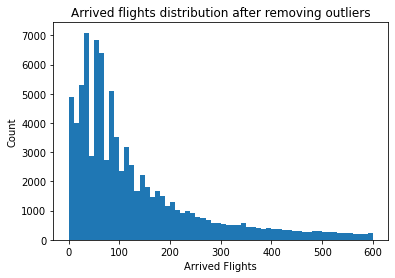

In [12]:
bins = np.arange(0,600+10,10)
plt.hist(flights['arr_flights'],bins = bins);
plt.title('Arrived flights distribution after removing outliers');
plt.xlabel('Arrived Flights')
plt.ylabel('Count');

- Looking at the distribution we can see that it is multimodal with a generally skewed to the right distribution

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


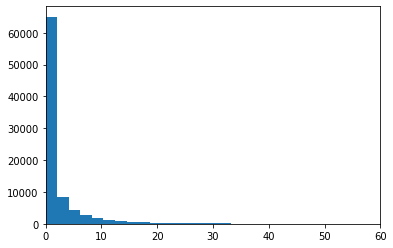

In [13]:
plt.hist(flights['arr_cancelled'],bins = 200)
plt.xlim(0,60);

In [14]:
flights['arr_cancelled'].describe()

count    87443.000000
mean         2.953513
std          9.302960
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max        415.000000
Name: arr_cancelled, dtype: float64

In [15]:
flights[flights['arr_cancelled'] == 415]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
24137,2020,4,G4,Allegiant Air,LAS,"Las Vegas, NV: McCarran International",420.0,2.0,0.0,0.0,2.0,0.0,0.0,415.0,0.0,179.0,0.0,0.0,179.0,0.0,0.0


- Looking at the data it doesn't seem that we should treat these values as outliers since they seem reasonable, and we can see that the distribution is unimodal with the most frequency of cancellations lying in the range [0,2]

In [16]:
def create_df_boxplot(df):
    plt.figure(figsize = (10,15))
    sb.boxplot(data=df)
    plt.xticks(rotation = 90);

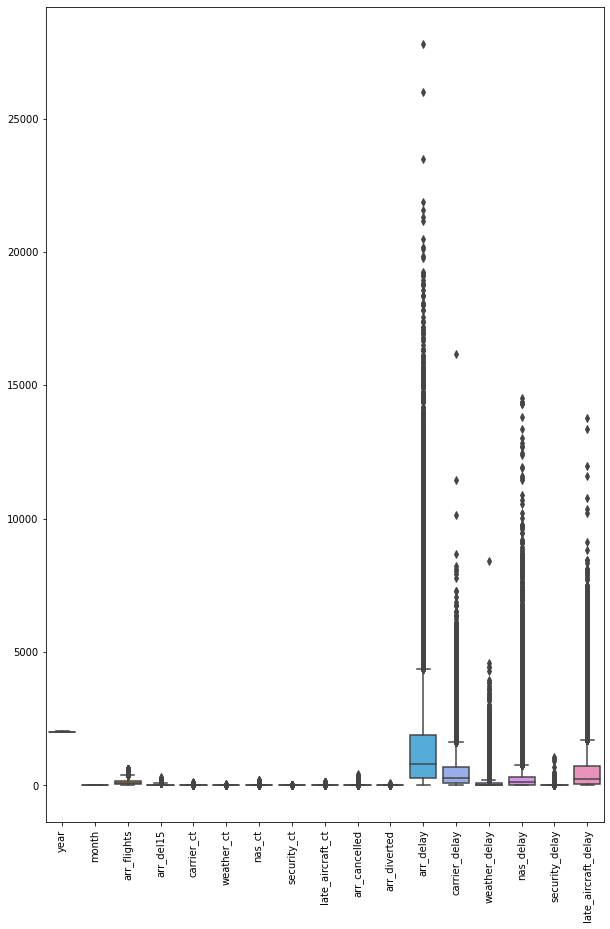

In [17]:
create_df_boxplot(df=flights);

- looking at the general distribution for numeric variables we can see there's a lot of outliers in arr_delay driving the outliers in the columns after it in the chart, so we will do another cleaning step tp get better insights from our data

In [18]:
flights['arr_delay'].describe()

count    87443.000000
mean      1474.546470
std       1925.957936
min          0.000000
25%        259.000000
50%        790.000000
75%       1906.500000
max      27791.000000
Name: arr_delay, dtype: float64

- According to Tucky's method we can define outliers as values more than 1.5*IQR (1.5* (1906-259)) = 2470.5 ~ 2470

In [19]:
flight_delays_to_drop = flights[flights['arr_delay'] > 2470].index

In [20]:
flights.drop(index = flight_delays_to_drop, inplace = True)

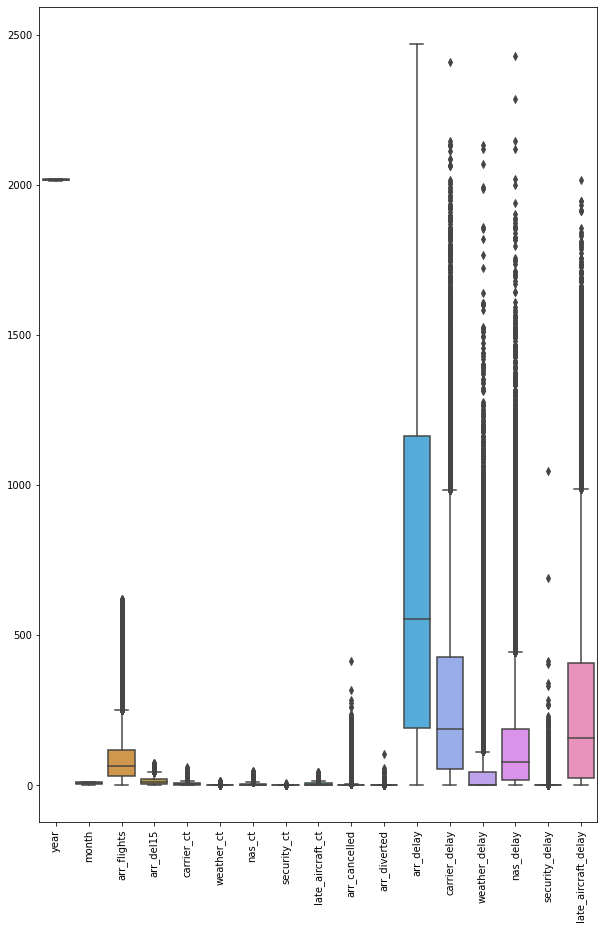

In [21]:
create_df_boxplot(df=flights);

- Now looking at the data we can see a better representation of our values, we still have outliers but they can be worked with this way. We will do another cleaning step to clean null values.

In [22]:
flights.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            163
arr_del15              352
carrier_ct             163
weather_ct             163
nas_ct                 163
security_ct            163
late_aircraft_ct       163
arr_cancelled          163
arr_diverted           163
arr_delay              163
carrier_delay          163
weather_delay          163
nas_delay              163
security_delay         163
late_aircraft_delay    163
dtype: int64

In [23]:
arr_flights_to_drop = flights[flights.arr_flights.isnull()].index
flights.drop(index = arr_flights_to_drop, inplace = True)

- Now let's see how weather conditions have affected delays

In [24]:
#Here we'll start our bins at 0.1 so we can discard the entries in which the delay factors haven't caused delays
def plot_default_histogram(df,col):
    bins = np.arange(0.1,df[col].max()+20,20)
    plt.hist(df[col], bins = bins)
    plt.title(col +' amount frequency')
    plt.xlabel(col)
    plt.ylabel('Frequency');

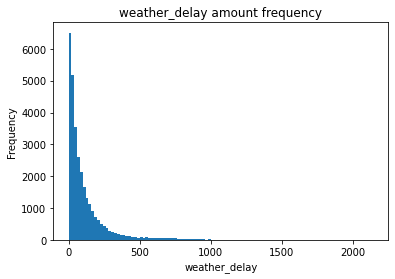

In [25]:
plot_default_histogram(df=flights, col = 'weather_delay');

- Looking at our histogram we can see that for most cases the weather has caused delays in the range 0-20 minutes, with the maximum delay caused by weather at 2200 mins (i.e 91.6 days)!

- What about security requirements? Have they caused significant delays?

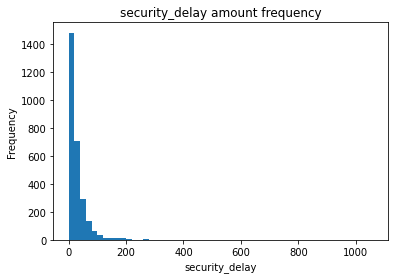

In [26]:
plot_default_histogram(df=flights, col = 'security_delay');

- From looking at the histogram we can tell that security requirements have a smaller effect on delay than weather conditions in general, we know that by looking the limits in the histogram as well as the slope of drop in the curve and where it starts to drop at low levels.

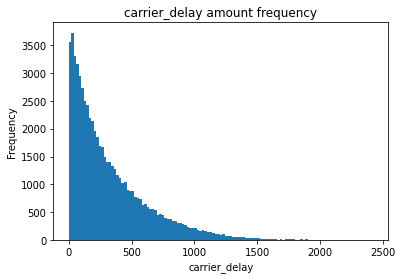

In [27]:
plot_default_histogram(df=flights, col = 'carrier_delay');

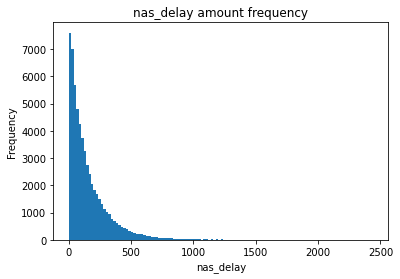

In [28]:
plot_default_histogram(df=flights, col = 'nas_delay');

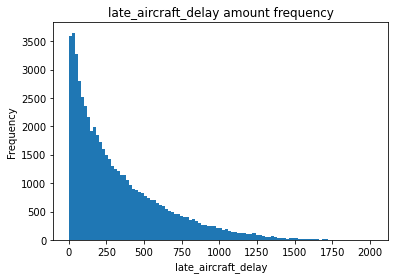

In [29]:
plot_default_histogram(df=flights, col = 'late_aircraft_delay');

- We see the rest of the histograms depicting almost the same trend and distribution, right skewed, unimodal distributions.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Yes, it was surprising to find that for example flights can be delayed for up to 90+ days due to weather conditions!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Almost all the histograms followed a unimodal , right skewed distribution. I made some changes to the data to tidy them cause there seemed to be lots of unresonable value for example more than 20,000 flights in an airport by a single airline in 1 month which seemed hard to believe.

## Bivariate Exploration

- To get an overview of the data we will start by plotting a Grid depicitng the general relationships amongst variables.

In [30]:
flights.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

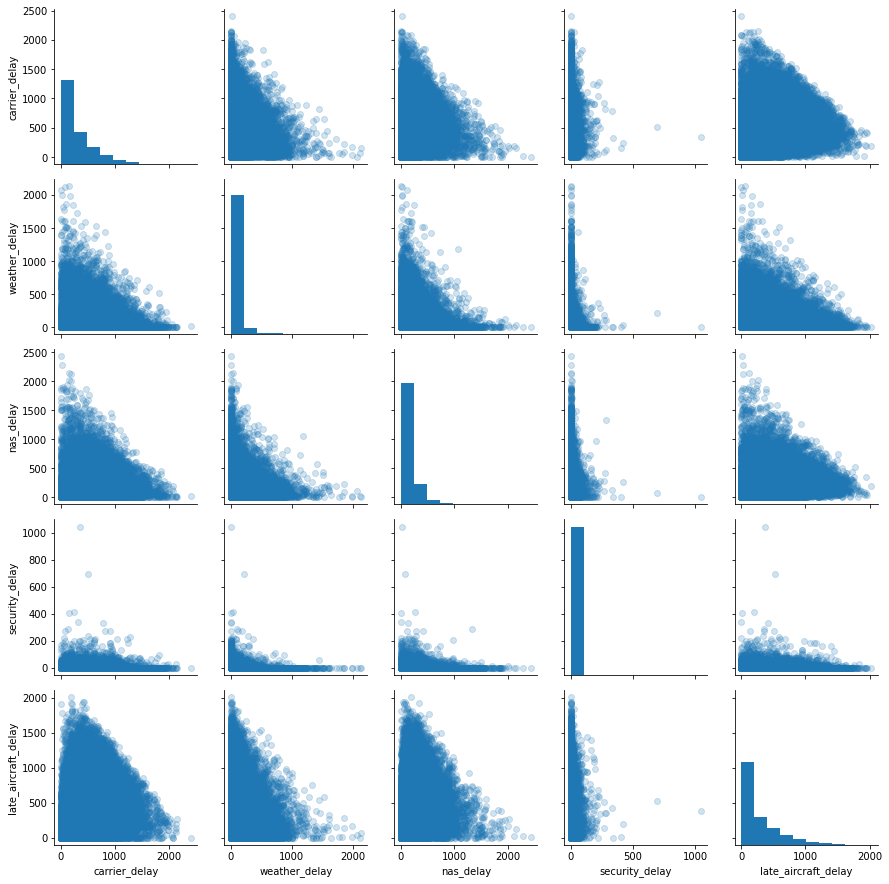

In [31]:
g = sb.PairGrid(data = flights, vars = ['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha = 0.2);

- For each of nas_delay, late aircraft delay, carrier_delay , weather delay we can see that there's a general negative trend for each one with the other , this means that if one type of delay occurs with high value for delay , the other type of delay is less likely to occur with high values

- Meanwhile security delay doesn't seem to have any correlation which other delay reasons which makes sense. 

> Now let's also generate a heatmap from correlation amongst variables

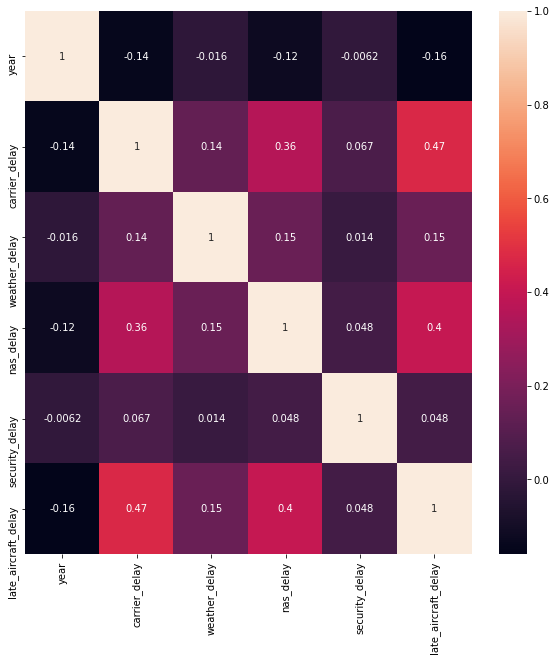

In [32]:
plt.figure(figsize = (10,10))
sb.heatmap(flights[['year','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']].corr(),annot = True);

In [33]:
flights_by_year = flights.groupby('year')

In [34]:
def plot_mean_line(df,col):
    df[col].mean().plot()
    plt.ylabel(col + ' (mean)')
    plt.title('mean '+col+' by year');

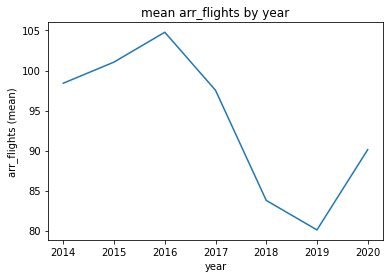

In [35]:
plot_mean_line(flights_by_year,'arr_flights')

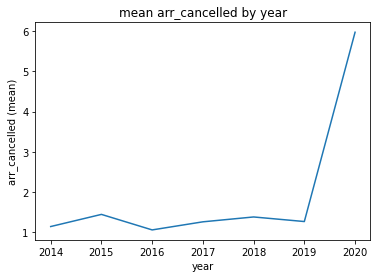

In [36]:
plot_mean_line(flights_by_year,'arr_cancelled')

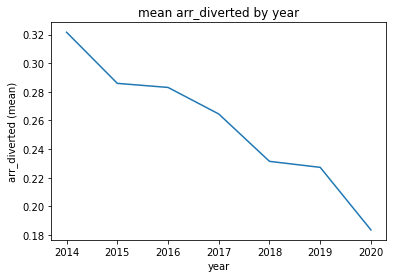

In [37]:
plot_mean_line(flights_by_year,'arr_diverted')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As explained earlier under the relevant plot there is a negative trend between delay reasons

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There's an interesting trend here in the year 2020 which has witnesses the largest cancellation rate and lowest diversion rate in all years being examined this can be depicted as due to the pandemic

## Multivariate Exploration

- Let's try to explore more to see if we can find trends in security delays.

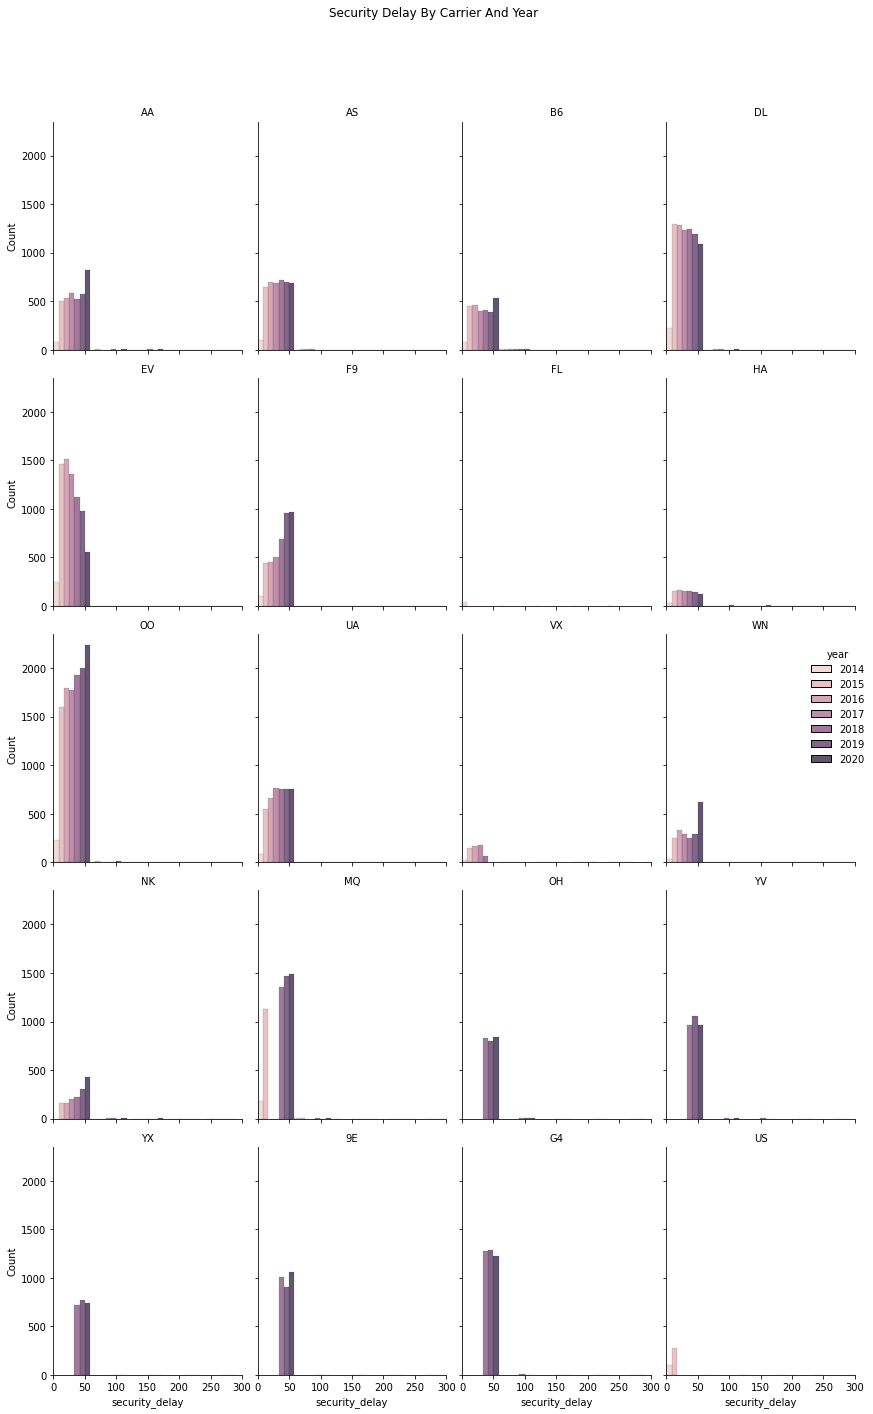

In [38]:
g = sb.displot(
    data=flights, x="security_delay", hue="year", col="carrier", col_wrap = 4,
    multiple = "dodge", height=4, aspect=.7,
)
g.add_legend()
plt.xlim(0,300)
g.set_titles("{col_name}");
plt.subplots_adjust(top=0.9);
g.fig.suptitle('Security Delay By Carrier And Year');

- From the figure we can see that most security delays lie around the 50 mins range with FL airline suffering from almost no security delays in the last few years. There doesn't seem to be a trend in security and has a different distribution across years and carrier combinations.

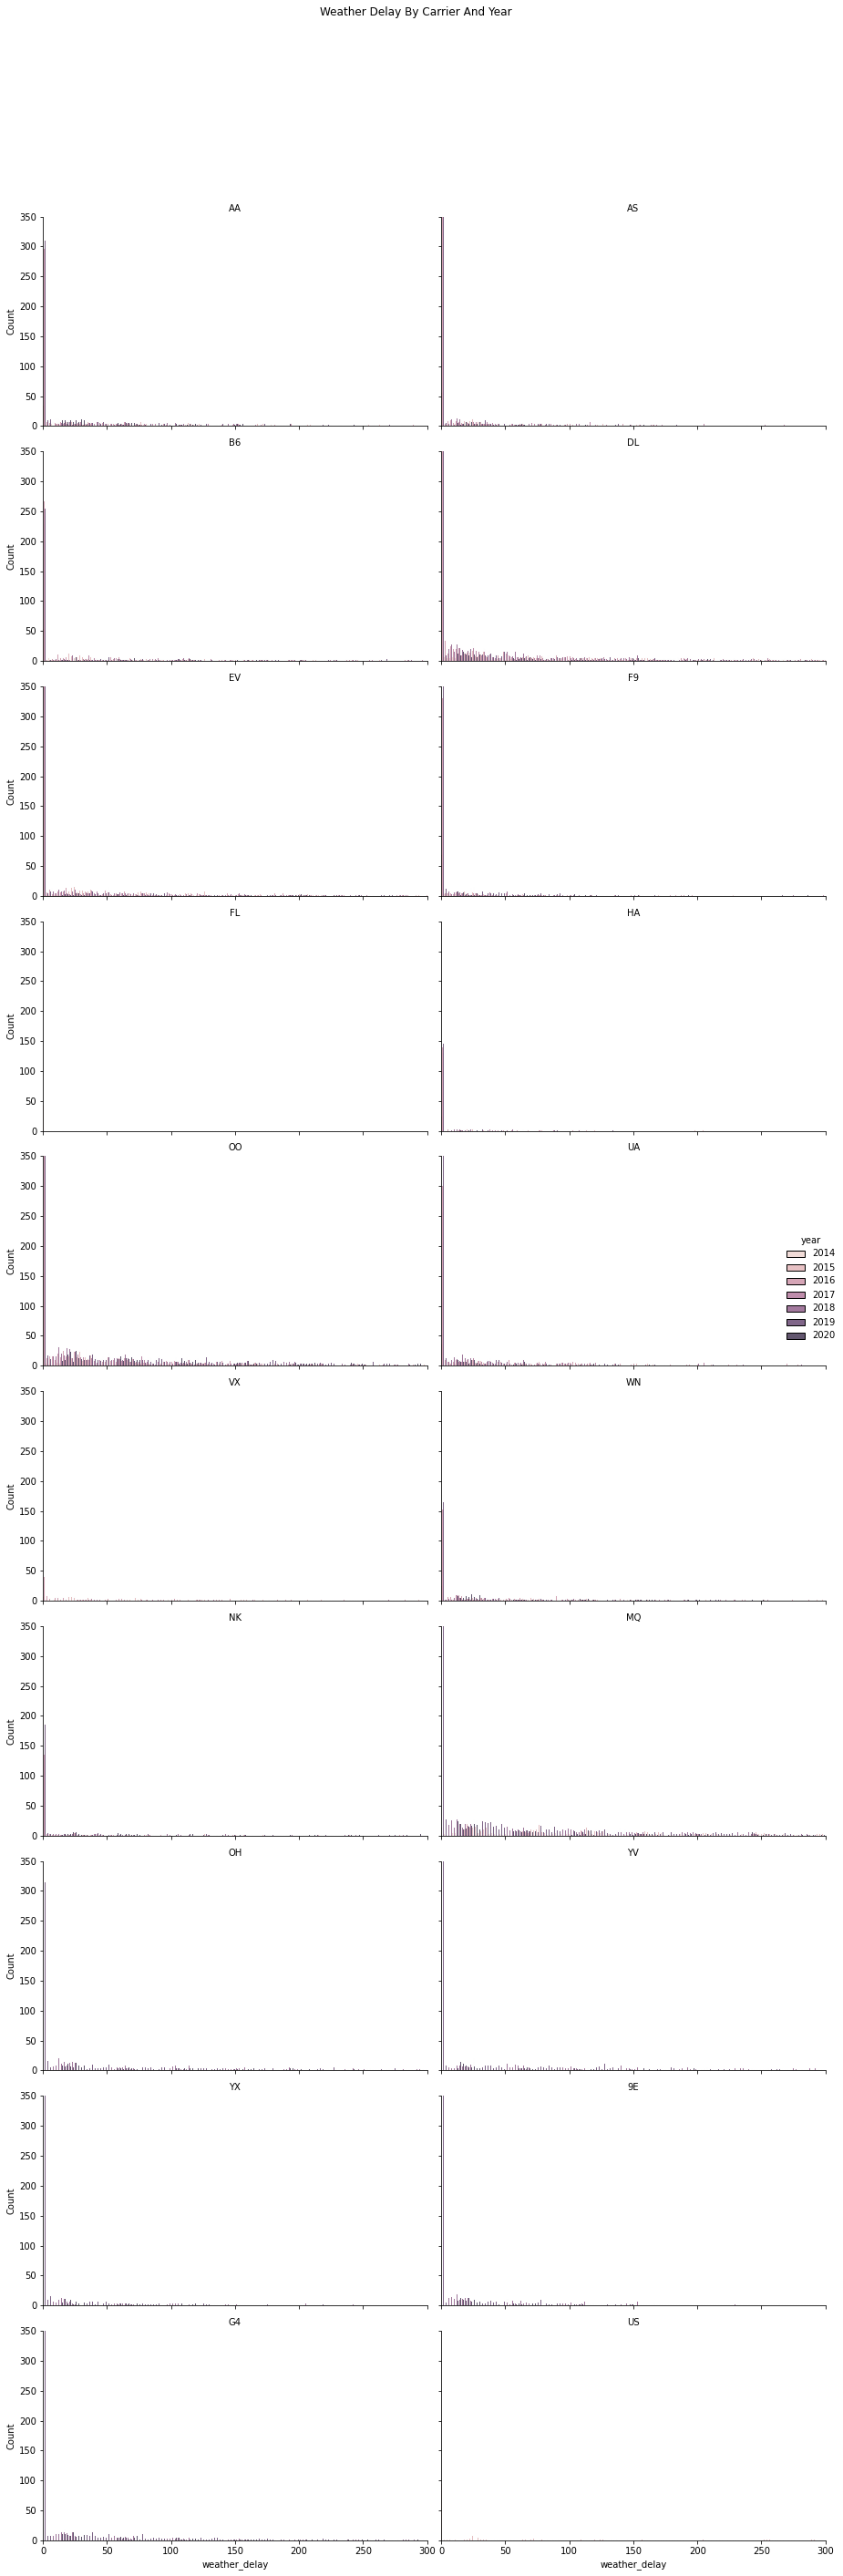

In [39]:
g = sb.displot(
    data=flights, x="weather_delay", hue="year", col="carrier", col_wrap = 2,
    multiple = "dodge", height=4, aspect=1.5,
)
g.add_legend();
plt.xlim(0,300);
plt.ylim(0,350);
g.set_titles("{col_name}");
plt.subplots_adjust(top=0.9);
g.fig.suptitle('Weather Delay By Carrier And Year');

- It's not easy to spot but if you use an abstract look you will see that the general trend of the year 2020 for the weather_delay, represented in the darkest color is quite less over almost all of the carriers being represented. 

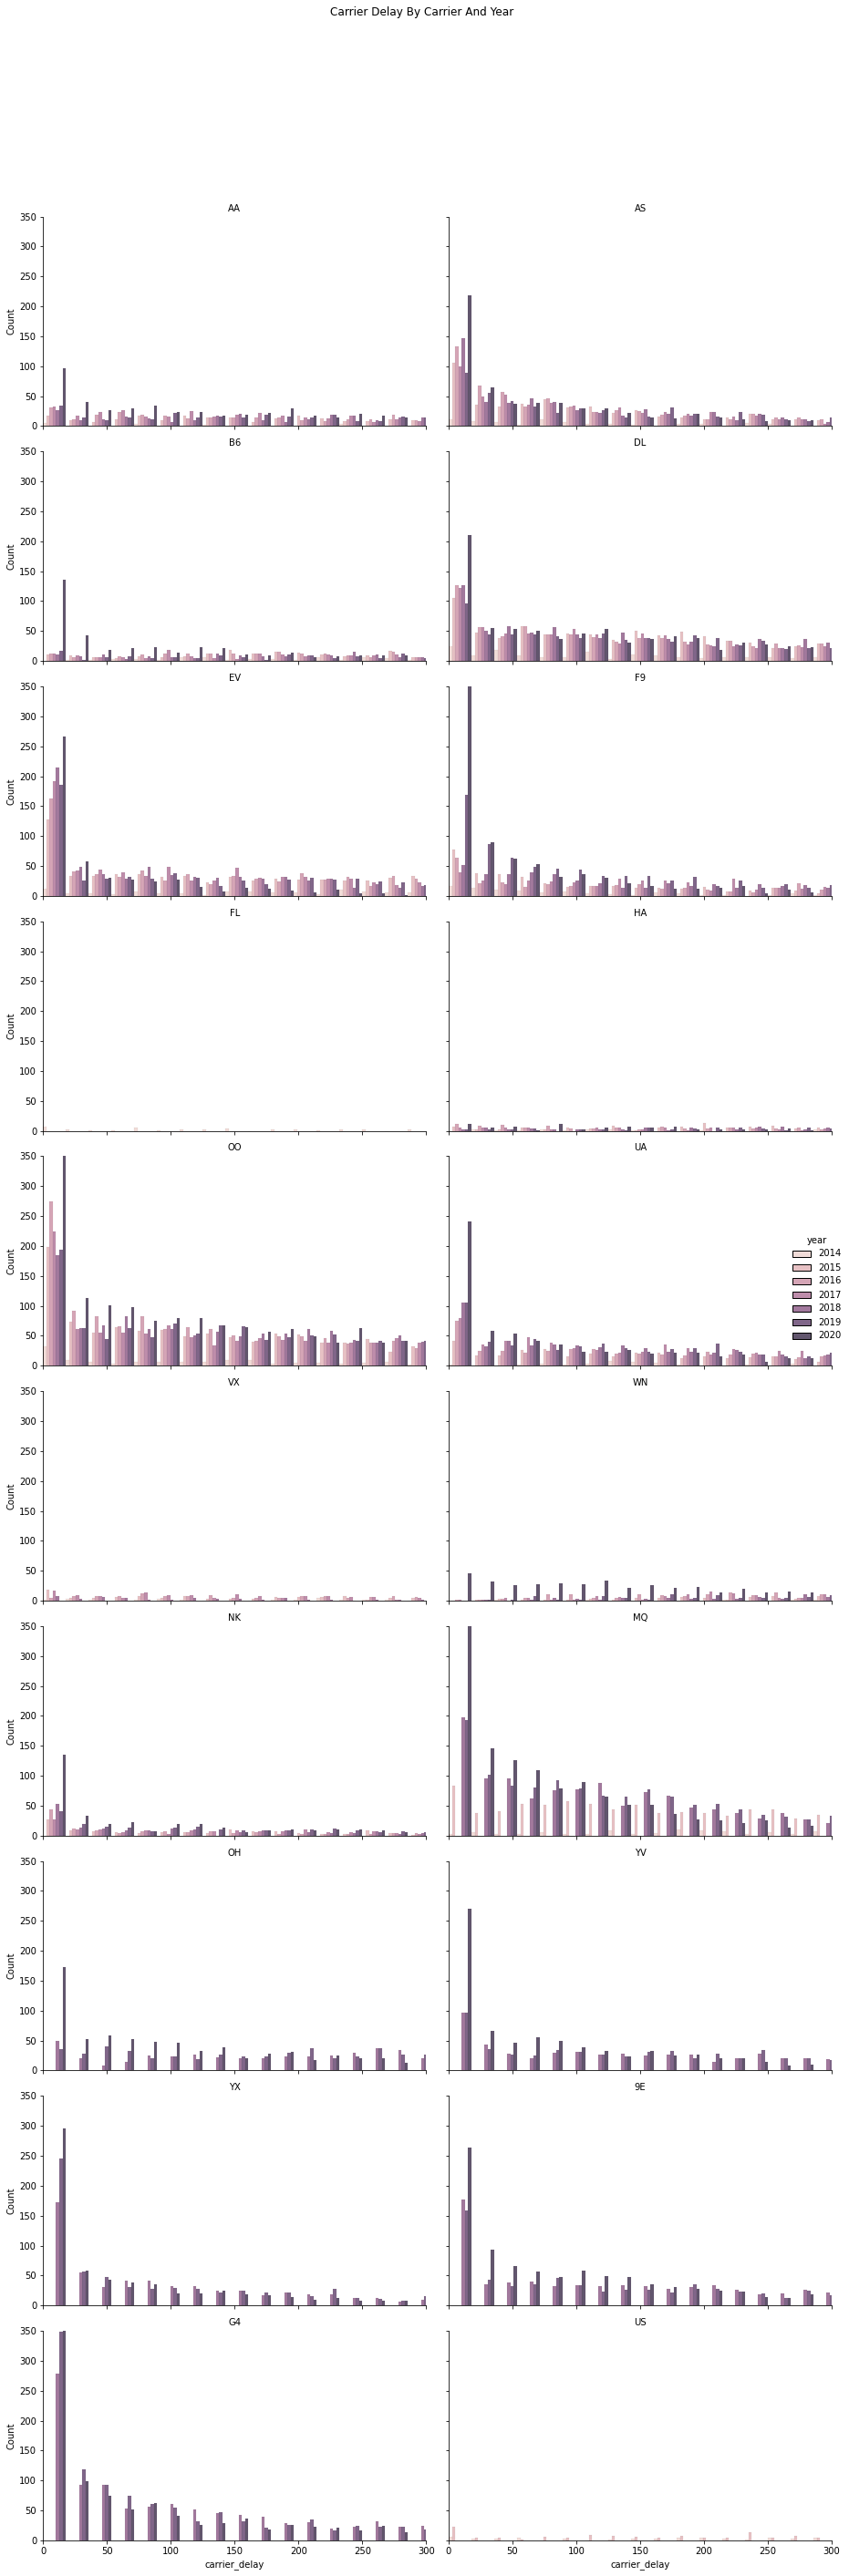

In [40]:
g = sb.displot(
    data=flights, x="carrier_delay", hue="year", col="carrier", col_wrap = 2,
    multiple = "dodge", height=4, aspect=1.5,
)
g.add_legend();
plt.xlim(0,300);
plt.ylim(0,350);
g.set_titles("{col_name}");
plt.subplots_adjust(top=0.9);
g.fig.suptitle('Carrier Delay By Carrier And Year');

- Surprisingly in 2020 all carriers have been doing worse in regards to delays.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Looking over years it seemed that weather conditions have caused less delays over the years. Maybe due to better equiped airplanes? better weather forecasting that prevented incorrect scheduling perhaps.

### Were there any interesting or surprising interactions between features?

> The security delays were quite interesting given that a particular airline has had almost no security delays over the past few years, others with increasing rates and some others with decreasing rates and others with no particular pattern or hovering around a certain average.
> Also, the carrier delays which seem to have spiked in 2020.